## Dataset: Deaths Involving COVID-19 by Vaccination Status

Data URL: <https://data.ontario.ca/dataset/1375bb00-6454-4d3e-a723-4ae9e849d655/resource/2aa6e2ce-40de-4910-a737-81762e014b0b/download/deaths_by_vac_status.csv>

This dataset reports the daily reported number of the 7-day moving average rates of Deaths involving covid-19 by vaccination status and by age group.

Data includes:
- Date on which the death occured
- Age group
- 7-day moving average of the last seven days of the death rate per 100,000 for those not fully vaccinated 
- 7-day moving average of the last seven days of the death rate per 100,000 for those fully vaccinated 
- 7-day moving average of the last seven days of the death rate per 100,000 for those vaccinated with at least one booster

Data range start: March 1, 2021
Data range end: November 12, 2024

Licence: Open Government Licence - Ontario

https://data.ontario.ca/dataset/1375bb00-6454-4d3e-a723-4ae9e849d655/resource/2aa6e2ce-40de-4910-a737-81762e014b0b

## Death Dependancies Visualization

The dataset includes COVID-19 death categorized by vaccination status and age group.

### Dependencies of death from age group

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [53]:
# load the dataset
file_path = "cleaned_deaths_involving_covid-19_by_vaccination_status_df.csv"
df = pd.read_csv(file_path)

#### The Number of COVID-19 Deaths by Age Group

In [9]:
# display the dataset column names
df.columns

Index(['date', 'deaths_boost_vac_rate_7ma', 'deaths_full_vac_rate_7ma',
       'deaths_not_full_vac_rate_7ma', 'age_group_0-4yrs',
       'age_group_12-17yrs', 'age_group_18-39yrs', 'age_group_40-59yrs',
       'age_group_5-11yrs', 'age_group_60+', 'age_group_all'],
      dtype='object')

In [11]:
# define age group columns
age_group_columns = [
    "age_group_0-4yrs", "age_group_5-11yrs", "age_group_12-17yrs",
    "age_group_18-39yrs", "age_group_40-59yrs", "age_group_60+", 'age_group_all'
]
print(age_group_columns)

['age_group_0-4yrs', 'age_group_5-11yrs', 'age_group_12-17yrs', 'age_group_18-39yrs', 'age_group_40-59yrs', 'age_group_60+', 'age_group_all']


In [13]:
# count occurences for each age group
age_group_death_counts = {col: df[col].sum() for col in age_group_columns}

In [15]:
# count occurrences for each age group
age_group_occurrences = {col: df[col].sum() for col in age_group_columns}

# print the occurrences
print("Occurrences for Each Age Group:")
for age_group, count in age_group_occurrences.items():
    print(f"{age_group}: {int(count)}")

Occurrences for Each Age Group:
age_group_0-4yrs: 1267
age_group_5-11yrs: 1267
age_group_12-17yrs: 1267
age_group_18-39yrs: 1268
age_group_40-59yrs: 1268
age_group_60+: 1277
age_group_all: 1278


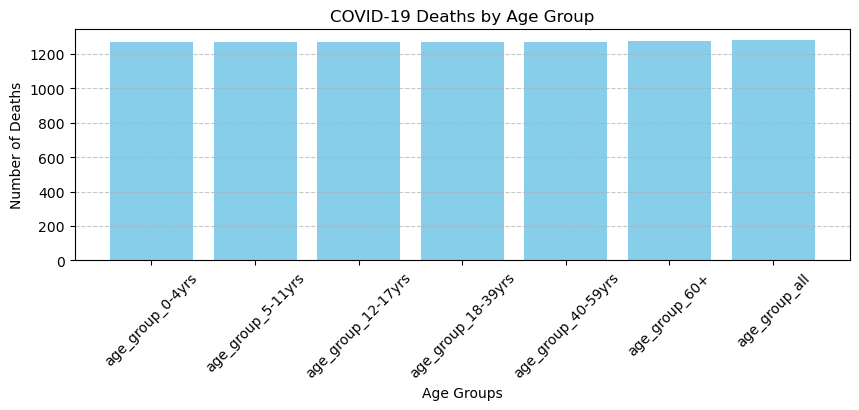

In [17]:
# create a bar chart
plt.figure(figsize=(10, 3))
plt.bar(age_group_death_counts.keys(), age_group_death_counts.values(), color='skyblue')
plt.xlabel("Age Groups")
plt.ylabel("Number of Deaths")
plt.title("COVID-19 Deaths by Age Group")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# display the chart
plt.show()

#### The Number of COVID-19 Deaths by Vaccination Status across Age Group

In [19]:
df.columns

Index(['date', 'deaths_boost_vac_rate_7ma', 'deaths_full_vac_rate_7ma',
       'deaths_not_full_vac_rate_7ma', 'age_group_0-4yrs',
       'age_group_12-17yrs', 'age_group_18-39yrs', 'age_group_40-59yrs',
       'age_group_5-11yrs', 'age_group_60+', 'age_group_all'],
      dtype='object')

In [21]:
# define age groups
age_groups = [
    "age_group_0-4yrs", "age_group_5-11yrs", "age_group_12-17yrs",
    "age_group_18-39yrs", "age_group_40-59yrs", "age_group_60+", 'age_group_all'
]
print(age_groups)

['age_group_0-4yrs', 'age_group_5-11yrs', 'age_group_12-17yrs', 'age_group_18-39yrs', 'age_group_40-59yrs', 'age_group_60+', 'age_group_all']


In [23]:
# define death types
death_types = ['deaths_boost_vac_rate_7ma', 'deaths_full_vac_rate_7ma',
       'deaths_not_full_vac_rate_7ma']
print(death_types)

['deaths_boost_vac_rate_7ma', 'deaths_full_vac_rate_7ma', 'deaths_not_full_vac_rate_7ma']


In [27]:
# aggregate death counts by age group for each death type
death_counts_by_age_group = {death_type: [] for death_type in death_types}

In [29]:
for age_group in age_groups:
    mask = df[age_group]  # filter rows where the specific age group is true
    for death_type in death_types:
        death_counts_by_age_group[death_type].append(df.loc[mask, death_type].sum())

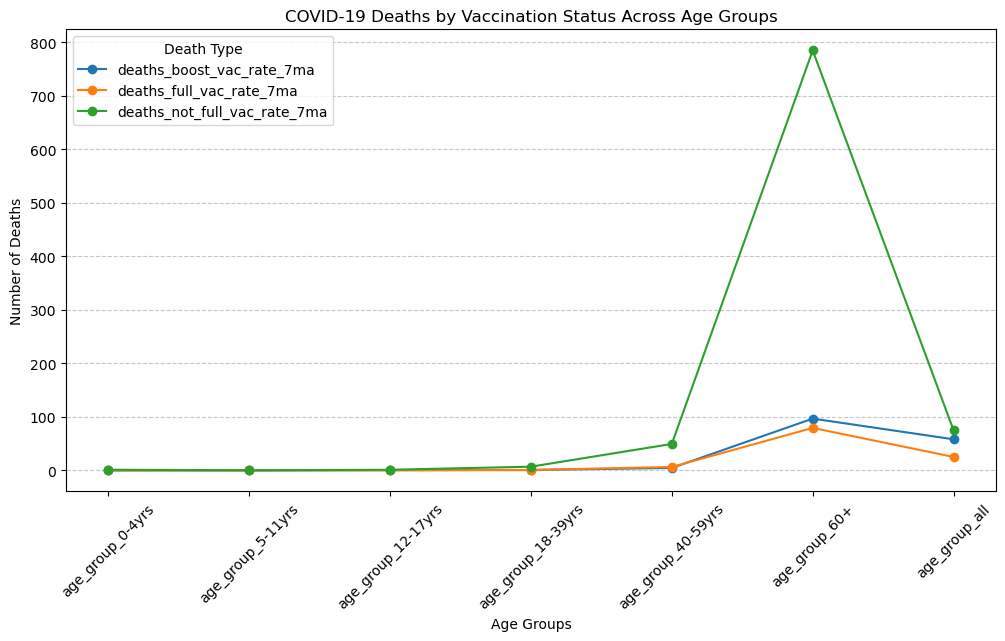

In [31]:
# plot the data
plt.figure(figsize=(12, 6))
for death_type, counts in death_counts_by_age_group.items():
    plt.plot(age_groups, counts, marker='o', linestyle='-', label=death_type)

plt.xlabel("Age Groups")
plt.ylabel("Number of Deaths")
plt.title("COVID-19 Deaths by Vaccination Status Across Age Groups")
plt.xticks(rotation=45)
plt.legend(title="Death Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# display the chart
plt.show()

#### The Number of Monthly COVID-19 Deaths by Vaccination Status

In [55]:
print(df['date'].dtype)

object


In [57]:
# convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [59]:
print(df['date'].dtype)

datetime64[ns]


In [61]:
# extract year and month for aggregation
df["year_month"] = df["date"].dt.to_period("M")

In [63]:
# aggregate death counts by month
monthly_deaths = df.groupby("year_month")[
    ["deaths_boost_vac_rate_7ma", "deaths_full_vac_rate_7ma", "deaths_not_full_vac_rate_7ma"]
].sum()

In [65]:
# convert period index to datetime for plotting
monthly_deaths.index = monthly_deaths.index.to_timestamp()

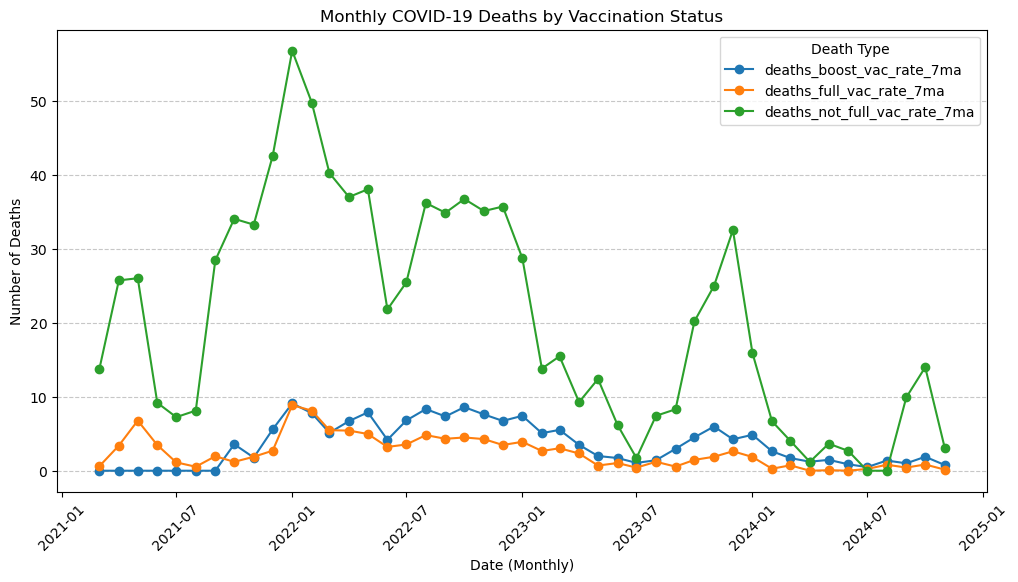

In [67]:
# plot the data
plt.figure(figsize=(12, 6))
for column in monthly_deaths.columns:
    plt.plot(monthly_deaths.index, monthly_deaths[column], marker='o', linestyle='-', label=column)

plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Deaths")
plt.title("Monthly COVID-19 Deaths by Vaccination Status")
plt.xticks(rotation=45)
plt.legend(title="Death Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the chart
plt.show()

#### The Number of Monthly COVID-19 Deaths by Vaccination Status and age group

In [69]:
df.columns

Index(['date', 'deaths_boost_vac_rate_7ma', 'deaths_full_vac_rate_7ma',
       'deaths_not_full_vac_rate_7ma', 'age_group_0-4yrs',
       'age_group_12-17yrs', 'age_group_18-39yrs', 'age_group_40-59yrs',
       'age_group_5-11yrs', 'age_group_60+', 'age_group_all', 'year_month'],
      dtype='object')

In [71]:
# define age group columns dynamically
age_groups = df.columns[4:11].tolist()
print(age_groups)

['age_group_0-4yrs', 'age_group_12-17yrs', 'age_group_18-39yrs', 'age_group_40-59yrs', 'age_group_5-11yrs', 'age_group_60+', 'age_group_all']


In [73]:
# define death types columns dynamically
death_types = df.columns[1:4].tolist()
print(death_types)

['deaths_boost_vac_rate_7ma', 'deaths_full_vac_rate_7ma', 'deaths_not_full_vac_rate_7ma']


In [75]:
# extract year and month for aggregation
df["year_month"] = df["date"].dt.to_period("M")

In [77]:
# initialize a dictionary to store aggregated death counts by age group and vaccination status over time
monthly_deaths_by_age_group = {}

In [79]:
for age_group in age_groups:
    # filter data for the specific age group
    mask = df[age_group]

    # aggregate death counts by month for each vaccination status
    grouped_data = df.loc[mask].groupby("year_month")[death_types].sum()

    # convert period index to datetime for plotting
    grouped_data.index = grouped_data.index.to_timestamp()

    # store the aggregated data
    monthly_deaths_by_age_group[age_group] = grouped_data

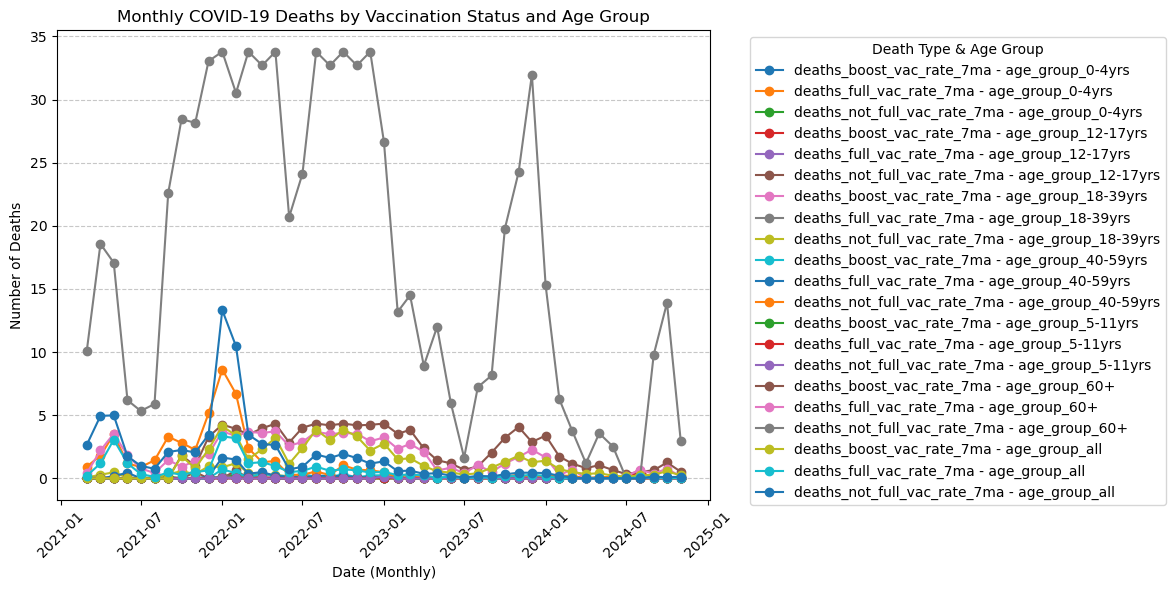

In [81]:
# plot the data
plt.figure(figsize=(12,6))

for age_group, data in monthly_deaths_by_age_group.items():
    for death_type in death_types:
        plt.plot(data.index, data[death_type], marker='o', linestyle='-', label=f"{death_type} - {age_group}")

plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Deaths")
plt.title("Monthly COVID-19 Deaths by Vaccination Status and Age Group")
plt.xticks(rotation=45)
plt.legend(title="Death Type & Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# display the chart
plt.show()

Excluding 'deaths_not_full_vac_rate_7ma' for 'age_group_60+' since this death rate is significantly higher than the others.

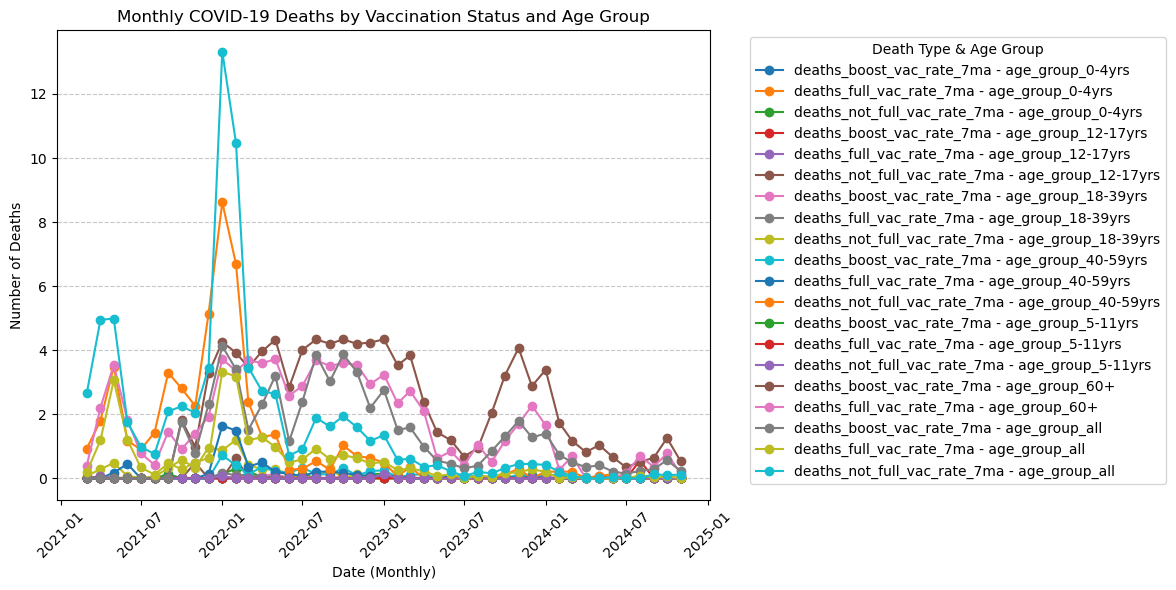

In [83]:
# plot the data
plt.figure(figsize=(12, 6))

for age_group, data in monthly_deaths_by_age_group.items():
    for death_type in death_types:
        # Exclude 'deaths_not_full_vac_rate_7ma' for 'age_group_60+'
        if age_group == "age_group_60+" and death_type == "deaths_not_full_vac_rate_7ma":
            continue  # Skip this combination
        plt.plot(data.index, data[death_type], marker='o', linestyle='-', label=f"{death_type} - {age_group}")

plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Deaths")
plt.title("Monthly COVID-19 Deaths by Vaccination Status and Age Group")
plt.xticks(rotation=45)
plt.legend(title="Death Type & Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# display the chart
plt.show()

Next, excluding also the 'deaths_full_vac_rate_7ma' for 'age_group_60+' since this death rate is significantly higher than the others.

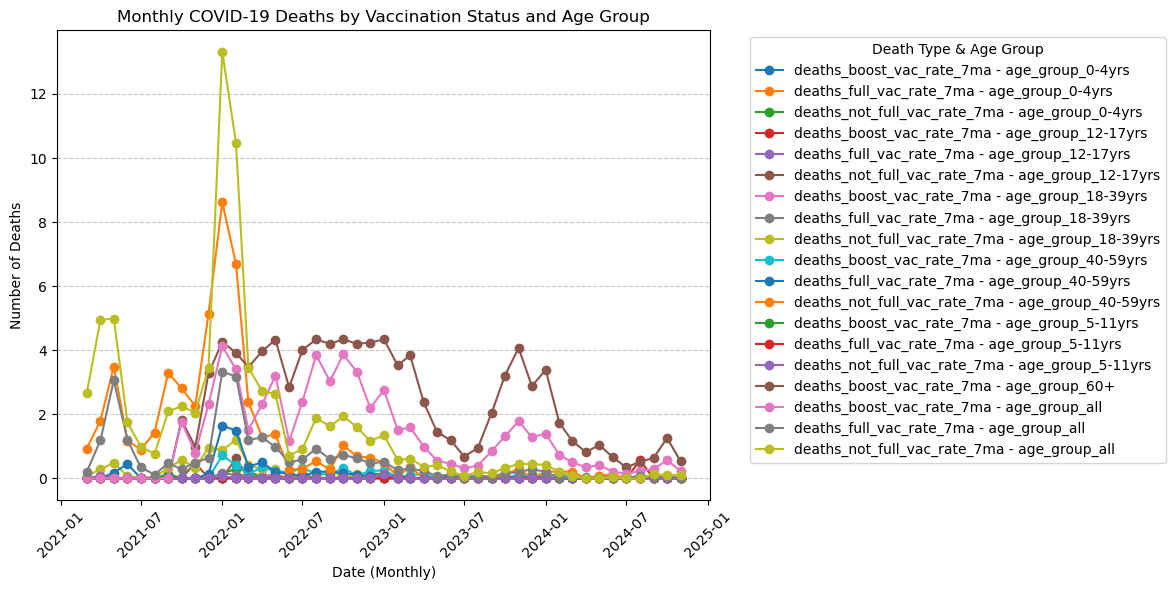

In [85]:
# plot the data
plt.figure(figsize=(12, 6))

for age_group, data in monthly_deaths_by_age_group.items():
    for death_type in death_types:
        # exclude both 'deaths_not_full_vac_rate_7ma' and 'deaths_full_vac_rate_7ma' for 'age_group_60+'
        if age_group == "age_group_60+" and (death_type == "deaths_not_full_vac_rate_7ma" or death_type == "deaths_full_vac_rate_7ma"):
            continue  # Skip this combination
        plt.plot(data.index, data[death_type], marker='o', linestyle='-', label=f"{death_type} - {age_group}")

plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Deaths")
plt.title("Monthly COVID-19 Deaths by Vaccination Status and Age Group")
plt.xticks(rotation=45)
plt.legend(title="Death Type & Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# display the chart
plt.show()

Exclude all 'age_group_60+' since this death rate is significantly higher than the others.

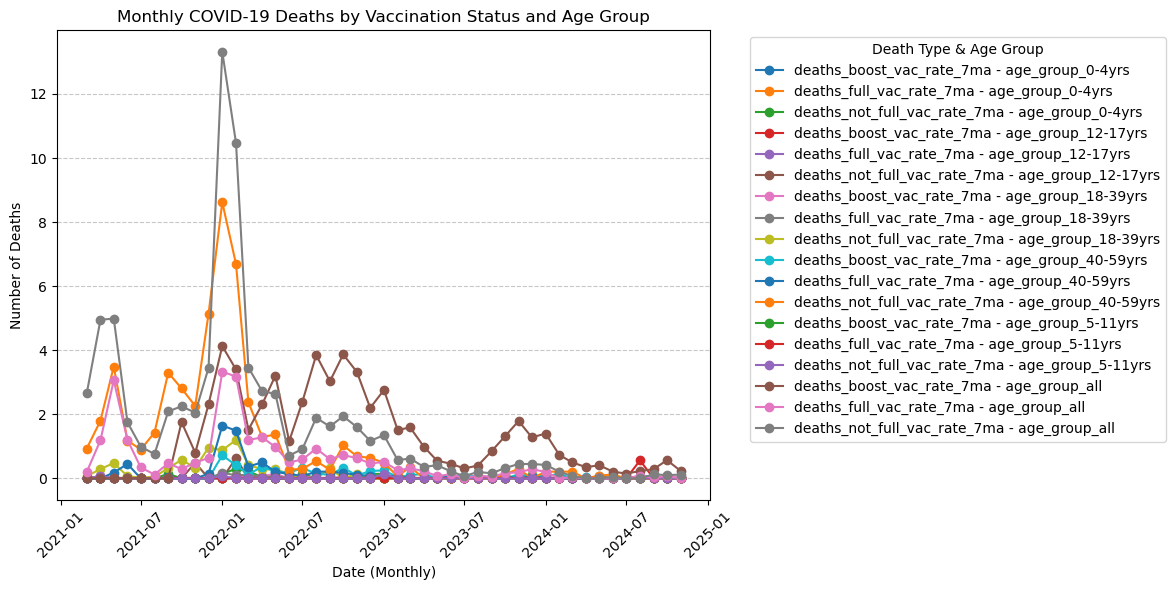

In [87]:
# plot the data
plt.figure(figsize=(12, 6))

for age_group, data in monthly_deaths_by_age_group.items():
    for death_type in death_types:
        # exclude 'age_group_60+'
        if age_group == "age_group_60+":
            continue  # Skip this combination
        plt.plot(data.index, data[death_type], marker='o', linestyle='-', label=f"{death_type} - {age_group}")

plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Deaths")
plt.title("Monthly COVID-19 Deaths by Vaccination Status and Age Group")
plt.xticks(rotation=45)
plt.legend(title="Death Type & Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# display the chart
plt.show()

In [ ]:
# Exclude any age_group and 'death rate' to investigate the dependancies.

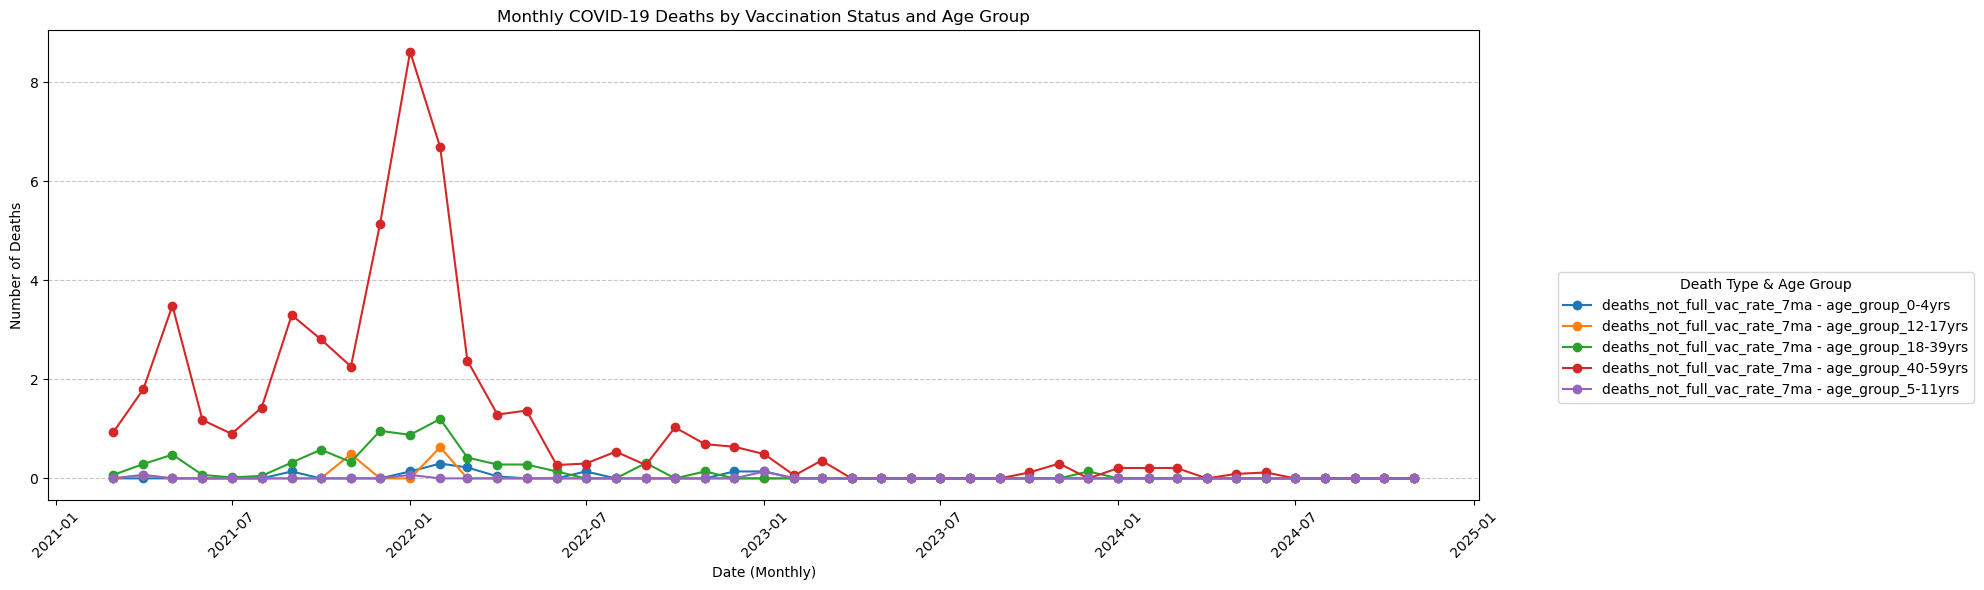

In [95]:
# plot the data
plt.figure(figsize=(20, 6))

for age_group, data in monthly_deaths_by_age_group.items():
    for death_type in death_types:
        # exclude 'age_group_60+'
        if age_group == "age_group_all":
            continue  # Skip this combination
        if age_group == "age_group_60+":
            continue  # Skip this combination
        # if age_group == "age_group_40-59yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_18-39yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_12-17yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_5-11yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_0-4yrs":
        #     continue  # Skip this combination
        # if death_type == "deaths_not_full_vac_rate_7ma":
        #     continue  # Skip this combination
        if death_type == "deaths_full_vac_rate_7ma":
            continue  # Skip this combination
        if death_type == "deaths_boost_vac_rate_7ma":
            continue  # Skip this combination
        plt.plot(data.index, data[death_type], marker='o', linestyle='-', label=f"{death_type} - {age_group}")

plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Deaths")
plt.title("Monthly COVID-19 Deaths by Vaccination Status and Age Group")
plt.xticks(rotation=45)
plt.legend(title="Death Type & Age Group", bbox_to_anchor=(1.05, 0.5), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# display the chart
plt.show()

These graphs show Monthly COVID-19 Deaths by various Vaccination Status and Age Group

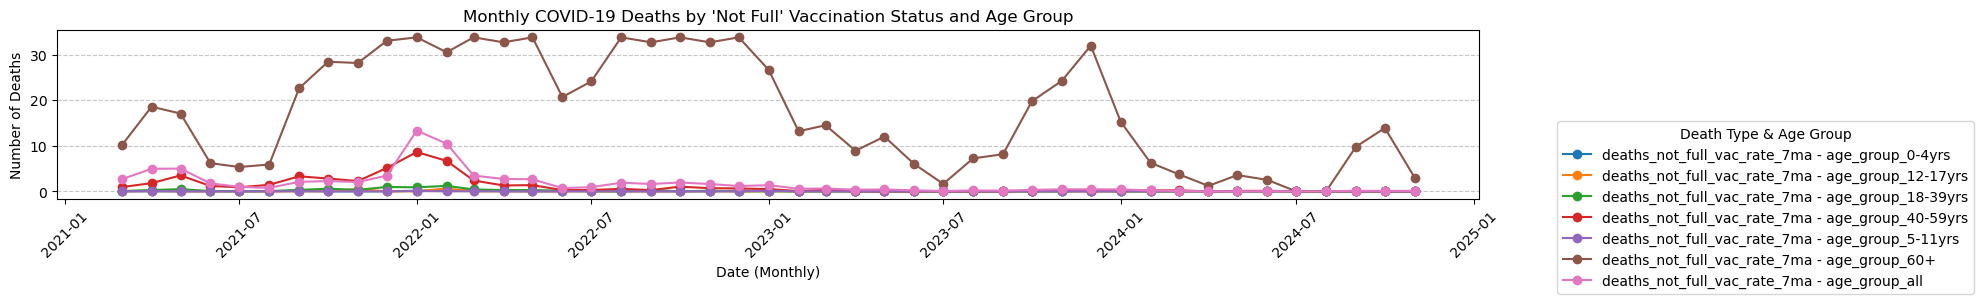

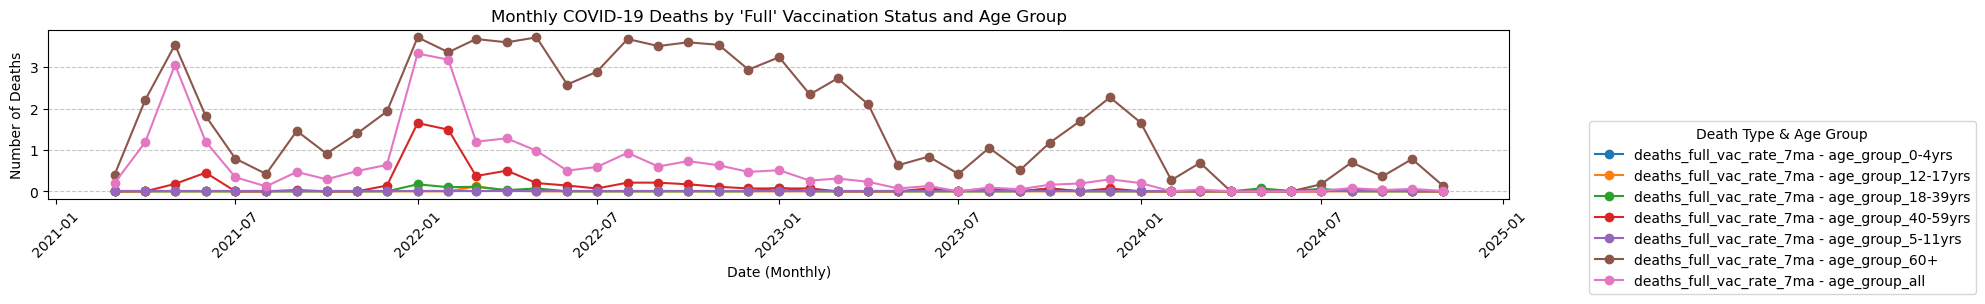

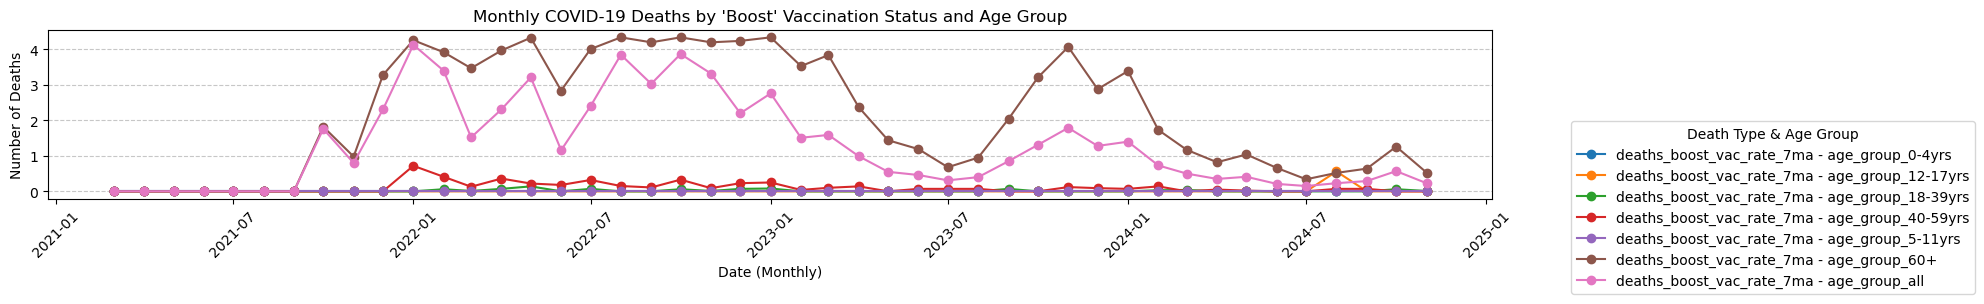

In [101]:
# plot the data
plt.figure(figsize=(20, 3))

for age_group, data in monthly_deaths_by_age_group.items():
    for death_type in death_types:
        # if age_group == "age_group_all":
        #     continue  # Skip this combination        
        # if age_group == "age_group_60+":
        #     continue  # Skip this combination
        # if age_group == "age_group_40-59yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_18-39yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_12-17yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_5-11yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_0-4yrs":
        #     continue  # Skip this combination
        # if death_type == "deaths_not_full_vac_rate_7ma":
        #     continue  # Skip this combination
        if death_type == "deaths_full_vac_rate_7ma":
            continue  # Skip this combination
        if death_type == "deaths_boost_vac_rate_7ma":
            continue  # Skip this combination
        plt.plot(data.index, data[death_type], marker='o', linestyle='-', label=f"{death_type} - {age_group}")

plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Deaths")
plt.title("Monthly COVID-19 Deaths by 'Not Full' Vaccination Status and Age Group")
plt.xticks(rotation=45)
plt.legend(title="Death Type & Age Group", bbox_to_anchor=(1.05, 0.5), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# display the chart
plt.show()

# plot the data
plt.figure(figsize=(20, 3))

for age_group, data in monthly_deaths_by_age_group.items():
    for death_type in death_types:
        # if age_group == "age_group_all":
        #     continue  # Skip this combination        
        # if age_group == "age_group_60+":
        #     continue  # Skip this combination
        # if age_group == "age_group_40-59yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_18-39yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_12-17yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_5-11yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_0-4yrs":
        #     continue  # Skip this combination
        if death_type == "deaths_not_full_vac_rate_7ma":
            continue  # Skip this combination
        # if death_type == "deaths_full_vac_rate_7ma":
        #     continue  # Skip this combination
        if death_type == "deaths_boost_vac_rate_7ma":
            continue  # Skip this combination
        plt.plot(data.index, data[death_type], marker='o', linestyle='-', label=f"{death_type} - {age_group}")

plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Deaths")
plt.title("Monthly COVID-19 Deaths by 'Full' Vaccination Status and Age Group")
plt.xticks(rotation=45)
plt.legend(title="Death Type & Age Group", bbox_to_anchor=(1.05, 0.5), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# display the chart
plt.show()

# plot the data
plt.figure(figsize=(20, 3))

for age_group, data in monthly_deaths_by_age_group.items():
    for death_type in death_types:
        # if age_group == "age_group_all":
        #     continue  # Skip this combination        
        # if age_group == "age_group_60+":
        #     continue  # Skip this combination
        # if age_group == "age_group_40-59yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_18-39yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_12-17yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_5-11yrs":
        #     continue  # Skip this combination
        # if age_group == "age_group_0-4yrs":
        #     continue  # Skip this combination
        if death_type == "deaths_not_full_vac_rate_7ma":
            continue  # Skip this combination
        if death_type == "deaths_full_vac_rate_7ma":
            continue  # Skip this combination
        # if death_type == "deaths_boost_vac_rate_7ma":
        #     continue  # Skip this combination
        plt.plot(data.index, data[death_type], marker='o', linestyle='-', label=f"{death_type} - {age_group}")

plt.xlabel("Date (Monthly)")
plt.ylabel("Number of Deaths")
plt.title("Monthly COVID-19 Deaths by 'Boost' Vaccination Status and Age Group")
plt.xticks(rotation=45)
plt.legend(title="Death Type & Age Group", bbox_to_anchor=(1.05, 0.5), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# display the chart
plt.show()